<a href="https://colab.research.google.com/github/JP-Garcia/cosc470s24/blob/main/solutions/fast_nn_sol_part_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn

Cloning into 'nn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 63 (delta 1), reused 3 (delta 0), pack-reused 55
Receiving objects: 100% (63/63), 16.43 MiB | 31.99 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/nn


In [ ]:
%cd nn

In [20]:
# this code depends on having executed the previous cell
# (i.e., you need to have cloned the nn code and cd'ed into it)
import network
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
validation_data = list(validation_data)
test_data = list(test_data)

(784, 1)
(28, 28)


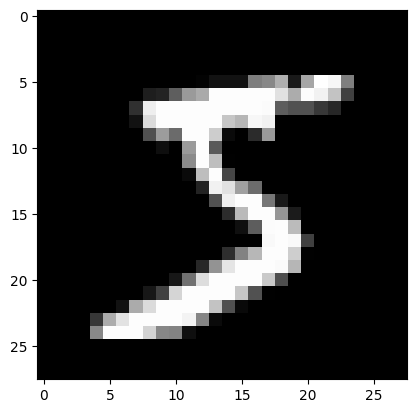

In [10]:
import numpy as np
import matplotlib.pyplot as plt
print(np.shape(training_data[0][0]))

# reshape to 28x28 img
training_img_0 = np.reshape(training_data[0][0], (28, 28))
print(np.shape(training_img_0))
plt.imshow(training_img_0, cmap="gray", vmin=0, vmax=1)
# plt.imshow(training_img_0, cmap="gray_r", vmin=0, vmax=1) # reversed

In [13]:
net = network.Network([784, 30, 10])
print(np.shape(net.weights[0]))
# print(net.weights[0][0]) # incoming weights to row 0
# print(np.shape(net.weights[0][0]))

(30, 784)


In [15]:
np.set_printoptions(linewidth=5000)

# part 2 - use this default configuration and the following hyper-parameters
#    epochs - 5 so we don't have to wait as long
#    batch size - 10
#    learning rate - 3.0
net = network.Network([784, 30, 10])
original_weights = net.weights

# print the shape of the connections between the input layer and the hidden layer
print(np.shape(original_weights[0]))

# print the shape of the connections between the hidden layer and the output layer
print(np.shape(original_weights[1]))

# now let's look at ALL 784 incoming connections to the first neuron in the hidden layer
print(np.shape(original_weights[0][0]))
print(original_weights[0][0])

# now let's look at ALL 30 incoming connections to the first neuron in the output layer
print(original_weights[1][0])
print(np.shape(original_weights[1][0]))

(30, 784)
(10, 30)
(784,)
[-1.44032773e-01 -2.94509146e+00  9.12317546e-01 -1.05070264e+00  7.97272325e-01 -4.88748919e-01 -2.75372344e-01  1.25411380e+00  1.36842237e-01 -8.51971774e-01  1.75379945e+00  3.22939167e-01 -1.55001682e+00  6.76701319e-01 -1.61669703e+00  2.93527344e-01  5.49921500e-01  1.34508460e+00 -2.28522470e+00 -8.90353947e-01 -9.44484629e-01  7.22358144e-01 -6.27497214e-01 -3.30812735e-01 -2.44816096e-01  1.08047745e+00 -1.33452845e+00  1.56457346e+00  6.44924496e-02  3.50505491e-01 -1.01042621e+00 -2.18910612e-02  1.43412842e+00 -1.04417779e+00 -7.30534522e-01  1.24081204e+00  5.94104759e-02 -4.13569173e-02 -2.25030072e-01 -9.15418077e-02 -3.21925124e-01  6.79489543e-01 -2.57563134e+00 -5.14353655e-01 -1.18478509e+00 -2.20730092e-02  5.84248442e-01 -4.27011639e-01 -4.65023396e-01  2.19432025e+00 -1.52435276e-01  3.31700431e-01  1.28876848e+00 -1.67851231e+00 -8.11099715e-01  8.97580448e-02 -8.38514247e-01 -3.77115807e-01 -4.90629571e-01 -1.46332407e+00 -7.49087187e-

In [21]:
# per digit accuracies
# loop through the test data again
# calculate how many of each digit was classified correctly
def calc_accuracy(test_data):
    correct_counts = [0 for _ in range(10)]
    digit_counts = [0 for _ in range(10)]

    for (x, y) in list(test_data):
      a = np.argmax(net.feedforward(x))
      if a == y:
        correct_counts[y] += 1
      digit_counts[y] += 1

    # print(correct_counts)
    # print(digit_counts)
    accuracies = [correct_counts[i]/digit_counts[i] for i in range(10)]
    print("Approx. Accuracy per #:", np.round(accuracies, 2))
    return(accuracies)
def print_accuracy(accuracies):
    fig = plt.figure(figsize = (10, 5))
     # creating the bar plot
    plt.bar(range(0,10), accuracies, color ='maroon',
            width = 0.4)
    plt.xlabel("Digit")
    plt.ylabel("Accuracy")
    plt.title("Per digit accuracy for standard hyperparams")
    plt.show()

Epoch 0 : 9429 / 10000
Epoch 1 : 9433 / 10000
Epoch 2 : 9447 / 10000
Epoch 3 : 9429 / 10000
Epoch 4 : 9455 / 10000
[[2.53577823e-12]
 [9.99940322e-01]
 [1.81142754e-04]
 [1.48996548e-05]
 [3.46909229e-05]
 [1.52544932e-03]
 [2.94138295e-06]
 [9.70852264e-06]
 [2.62168774e-05]
 [7.20979760e-09]]
1
1
Approx. Accuracy per #: [0.97 0.99 0.93 0.94 0.97 0.92 0.96 0.95 0.91 0.91]


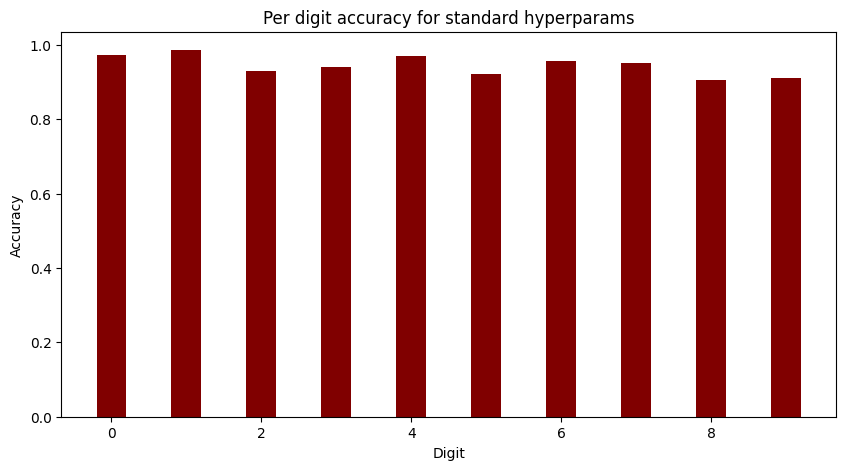

In [22]:
net.SGD(training_data, 5, 10, 3.0, test_data=test_data)

a = net.feedforward(test_data[2][0])
print(a)
print(np.argmax(a))
print(test_data[2][1])

print_accuracy(calc_accuracy(test_data))

-------------------------------------------------- 
 Begin Epoch Hyper-Parameter 1: 5
Epoch 0 : 9481 / 10000
Epoch 1 : 9476 / 10000
Epoch 2 : 9472 / 10000
Epoch 3 : 9477 / 10000
Epoch 4 : 9478 / 10000
Approx. Accuracy per #: [0.98 0.98 0.94 0.94 0.95 0.93 0.95 0.95 0.93 0.92]


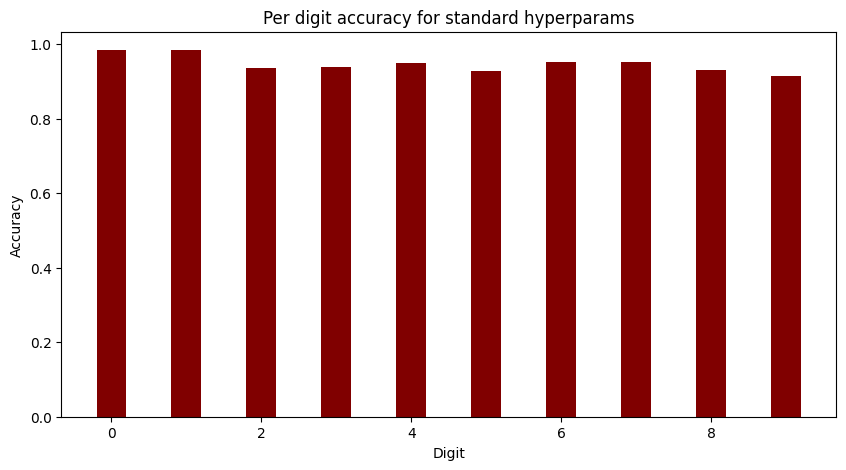

-------------------------------------------------- 
 Begin Epoch Hyper-Parameter 2: 15
Epoch 0 : 9465 / 10000
Epoch 1 : 9464 / 10000
Epoch 2 : 9456 / 10000
Epoch 3 : 9473 / 10000
Epoch 4 : 9472 / 10000
Epoch 5 : 9475 / 10000
Epoch 6 : 9470 / 10000
Epoch 7 : 9478 / 10000
Epoch 8 : 9479 / 10000
Epoch 9 : 9480 / 10000
Epoch 10 : 9466 / 10000
Epoch 11 : 9480 / 10000
Epoch 12 : 9472 / 10000
Epoch 13 : 9478 / 10000
Epoch 14 : 9460 / 10000
Approx. Accuracy per #: [0.98 0.99 0.93 0.94 0.95 0.91 0.96 0.95 0.92 0.92]


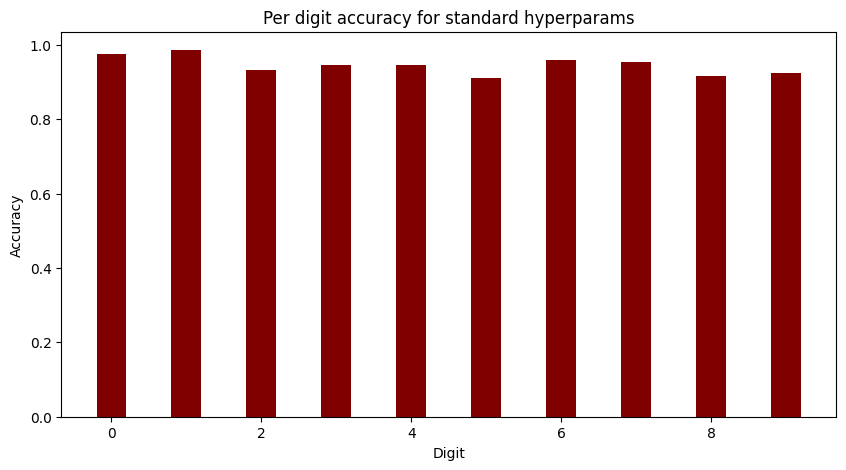

-------------------------------------------------- 
 Begin Epoch Hyper-Parameter 3: 30
Epoch 0 : 9481 / 10000
Epoch 1 : 9465 / 10000
Epoch 2 : 9472 / 10000
Epoch 3 : 9469 / 10000
Epoch 4 : 9481 / 10000
Epoch 5 : 9477 / 10000
Epoch 6 : 9474 / 10000
Epoch 7 : 9479 / 10000
Epoch 8 : 9470 / 10000
Epoch 9 : 9475 / 10000
Epoch 10 : 9473 / 10000
Epoch 11 : 9469 / 10000
Epoch 12 : 9469 / 10000
Epoch 13 : 9476 / 10000
Epoch 14 : 9483 / 10000
Epoch 15 : 9474 / 10000
Epoch 16 : 9481 / 10000
Epoch 17 : 9465 / 10000
Epoch 18 : 9478 / 10000
Epoch 19 : 9473 / 10000
Epoch 20 : 9475 / 10000
Epoch 21 : 9475 / 10000
Epoch 22 : 9474 / 10000
Epoch 23 : 9488 / 10000
Epoch 24 : 9476 / 10000
Epoch 25 : 9471 / 10000
Epoch 26 : 9470 / 10000
Epoch 27 : 9472 / 10000
Epoch 28 : 9479 / 10000
Epoch 29 : 9481 / 10000
Approx. Accuracy per #: [0.98 0.99 0.93 0.95 0.94 0.92 0.95 0.95 0.93 0.93]


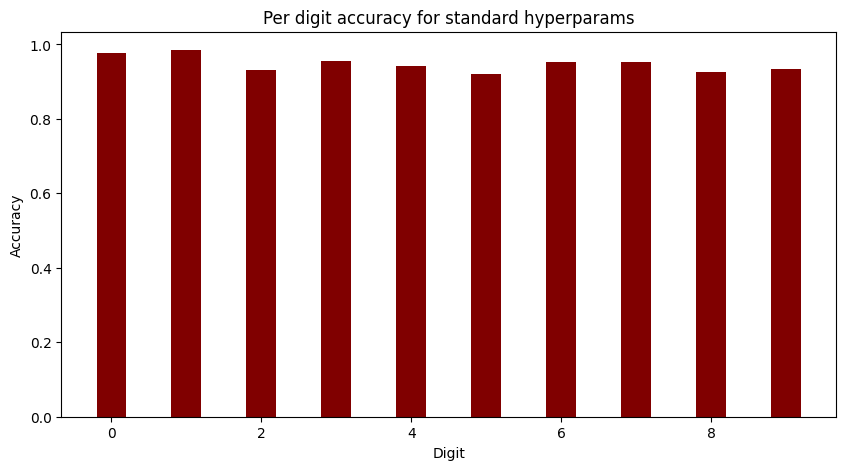

-------------------------------------------------- 
 Begin Epoch Hyper-Parameter 4: 60
Epoch 0 : 9474 / 10000
Epoch 1 : 9469 / 10000
Epoch 2 : 9467 / 10000
Epoch 3 : 9463 / 10000
Epoch 4 : 9463 / 10000
Epoch 5 : 9466 / 10000
Epoch 6 : 9467 / 10000
Epoch 7 : 9453 / 10000
Epoch 8 : 9475 / 10000
Epoch 9 : 9481 / 10000
Epoch 10 : 9476 / 10000
Epoch 11 : 9461 / 10000
Epoch 12 : 9473 / 10000
Epoch 13 : 9465 / 10000
Epoch 14 : 9463 / 10000
Epoch 15 : 9468 / 10000
Epoch 16 : 9470 / 10000
Epoch 17 : 9476 / 10000
Epoch 18 : 9472 / 10000
Epoch 19 : 9461 / 10000
Epoch 20 : 9459 / 10000
Epoch 21 : 9463 / 10000
Epoch 22 : 9474 / 10000
Epoch 23 : 9476 / 10000
Epoch 24 : 9463 / 10000
Epoch 25 : 9463 / 10000
Epoch 26 : 9464 / 10000
Epoch 27 : 9473 / 10000
Epoch 28 : 9475 / 10000
Epoch 29 : 9464 / 10000
Epoch 30 : 9469 / 10000
Epoch 31 : 9475 / 10000
Epoch 32 : 9457 / 10000
Epoch 33 : 9465 / 10000
Epoch 34 : 9477 / 10000
Epoch 35 : 9458 / 10000
Epoch 36 : 9456 / 10000
Epoch 37 : 9447 / 10000
Epoch 38 : 

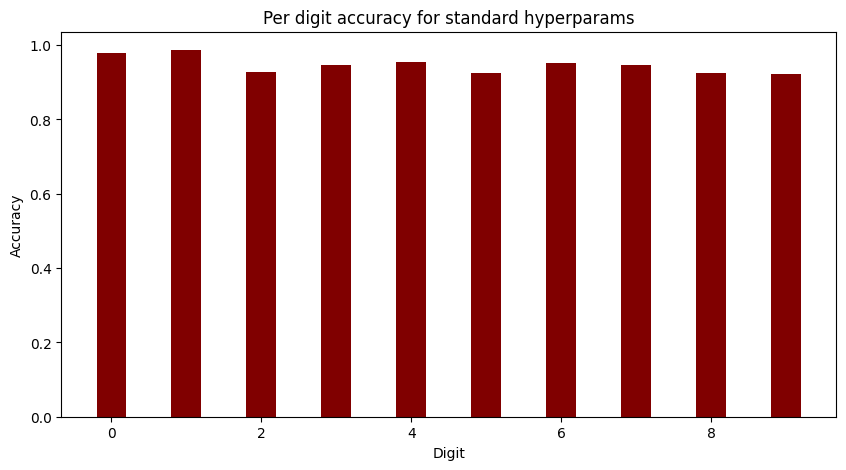

-------------------------------------------------- 
 Begin Batch Hyper-Parameter 1: 5
Epoch 0 : 9293 / 10000
Epoch 1 : 9336 / 10000
Epoch 2 : 9395 / 10000
Epoch 3 : 9395 / 10000
Epoch 4 : 9427 / 10000
Epoch 5 : 9460 / 10000
Epoch 6 : 9390 / 10000
Epoch 7 : 9404 / 10000
Epoch 8 : 9413 / 10000
Epoch 9 : 9470 / 10000
Epoch 10 : 9445 / 10000
Epoch 11 : 9452 / 10000
Epoch 12 : 9438 / 10000
Epoch 13 : 9477 / 10000
Epoch 14 : 9388 / 10000
Epoch 15 : 9454 / 10000
Epoch 16 : 9389 / 10000
Epoch 17 : 9461 / 10000
Epoch 18 : 9437 / 10000
Epoch 19 : 9439 / 10000
Epoch 20 : 9469 / 10000
Epoch 21 : 9455 / 10000
Epoch 22 : 9446 / 10000
Epoch 23 : 9466 / 10000
Epoch 24 : 9463 / 10000
Epoch 25 : 9468 / 10000
Epoch 26 : 9437 / 10000
Epoch 27 : 9454 / 10000
Epoch 28 : 9449 / 10000
Epoch 29 : 9464 / 10000
Approx. Accuracy per #: [0.98 0.98 0.92 0.94 0.95 0.91 0.94 0.96 0.93 0.94]


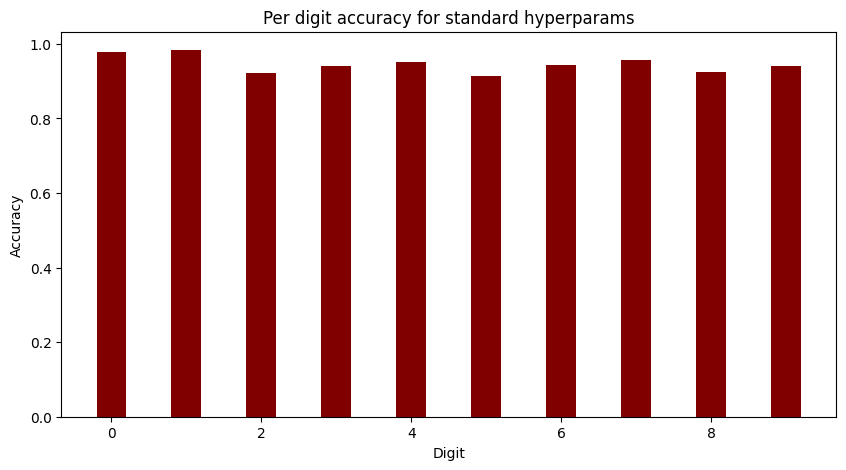

-------------------------------------------------- 
 Begin Batch Hyper-Parameter 2: 10
Epoch 0 : 9471 / 10000
Epoch 1 : 9479 / 10000
Epoch 2 : 9476 / 10000
Epoch 3 : 9498 / 10000
Epoch 4 : 9483 / 10000
Epoch 5 : 9479 / 10000
Epoch 6 : 9487 / 10000
Epoch 7 : 9482 / 10000
Epoch 8 : 9480 / 10000
Epoch 9 : 9490 / 10000
Epoch 10 : 9482 / 10000
Epoch 11 : 9481 / 10000
Epoch 12 : 9491 / 10000
Epoch 13 : 9473 / 10000
Epoch 14 : 9485 / 10000
Epoch 15 : 9486 / 10000
Epoch 16 : 9489 / 10000
Epoch 17 : 9480 / 10000
Epoch 18 : 9473 / 10000
Epoch 19 : 9484 / 10000
Epoch 20 : 9477 / 10000
Epoch 21 : 9470 / 10000
Epoch 22 : 9477 / 10000
Epoch 23 : 9481 / 10000
Epoch 24 : 9479 / 10000
Epoch 25 : 9478 / 10000
Epoch 26 : 9485 / 10000
Epoch 27 : 9478 / 10000
Epoch 28 : 9483 / 10000
Epoch 29 : 9485 / 10000
Approx. Accuracy per #: [0.98 0.99 0.93 0.95 0.95 0.94 0.95 0.95 0.93 0.92]


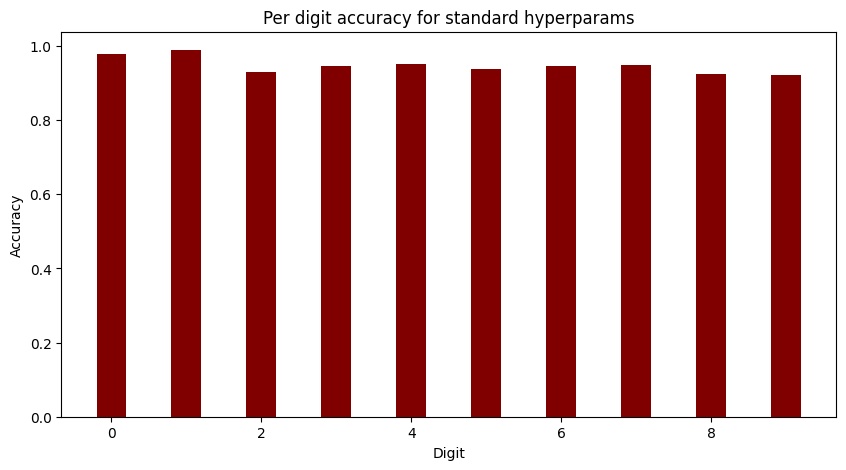

-------------------------------------------------- 
 Begin Batch Hyper-Parameter 3: 50
Epoch 0 : 9488 / 10000
Epoch 1 : 9479 / 10000
Epoch 2 : 9478 / 10000
Epoch 3 : 9479 / 10000
Epoch 4 : 9477 / 10000
Epoch 5 : 9479 / 10000
Epoch 6 : 9477 / 10000
Epoch 7 : 9478 / 10000
Epoch 8 : 9481 / 10000
Epoch 9 : 9481 / 10000
Epoch 10 : 9481 / 10000
Epoch 11 : 9478 / 10000
Epoch 12 : 9475 / 10000
Epoch 13 : 9478 / 10000
Epoch 14 : 9475 / 10000
Epoch 15 : 9477 / 10000
Epoch 16 : 9481 / 10000
Epoch 17 : 9481 / 10000
Epoch 18 : 9480 / 10000
Epoch 19 : 9485 / 10000
Epoch 20 : 9479 / 10000
Epoch 21 : 9482 / 10000
Epoch 22 : 9485 / 10000
Epoch 23 : 9483 / 10000
Epoch 24 : 9483 / 10000
Epoch 25 : 9483 / 10000
Epoch 26 : 9483 / 10000
Epoch 27 : 9481 / 10000
Epoch 28 : 9483 / 10000
Epoch 29 : 9480 / 10000
Approx. Accuracy per #: [0.97 0.99 0.93 0.95 0.95 0.94 0.95 0.95 0.93 0.92]


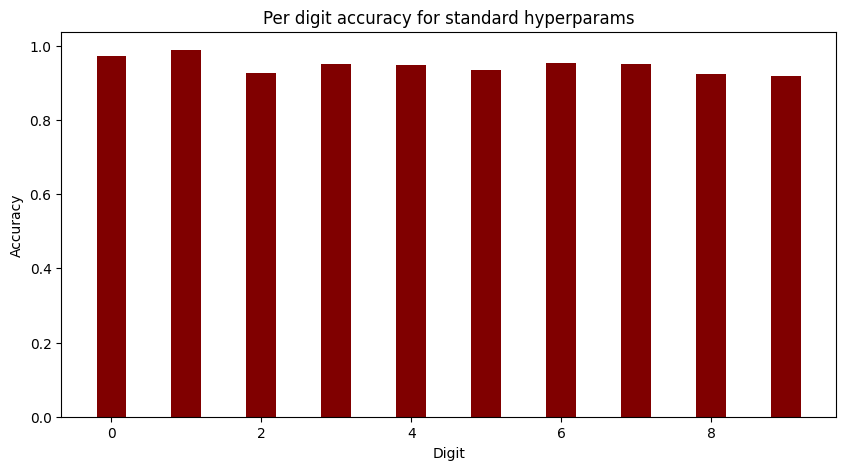

-------------------------------------------------- 
 Begin Batch Hyper-Parameter 4: 100
Epoch 0 : 9481 / 10000
Epoch 1 : 9478 / 10000
Epoch 2 : 9479 / 10000
Epoch 3 : 9480 / 10000
Epoch 4 : 9479 / 10000
Epoch 5 : 9478 / 10000
Epoch 6 : 9477 / 10000
Epoch 7 : 9482 / 10000
Epoch 8 : 9479 / 10000
Epoch 9 : 9477 / 10000
Epoch 10 : 9481 / 10000
Epoch 11 : 9477 / 10000
Epoch 12 : 9480 / 10000
Epoch 13 : 9479 / 10000
Epoch 14 : 9479 / 10000
Epoch 15 : 9478 / 10000
Epoch 16 : 9475 / 10000
Epoch 17 : 9478 / 10000
Epoch 18 : 9479 / 10000
Epoch 19 : 9482 / 10000
Epoch 20 : 9478 / 10000
Epoch 21 : 9481 / 10000
Epoch 22 : 9481 / 10000
Epoch 23 : 9479 / 10000
Epoch 24 : 9478 / 10000
Epoch 25 : 9478 / 10000
Epoch 26 : 9481 / 10000
Epoch 27 : 9478 / 10000
Epoch 28 : 9479 / 10000
Epoch 29 : 9479 / 10000
Approx. Accuracy per #: [0.97 0.99 0.93 0.95 0.95 0.93 0.95 0.95 0.93 0.92]


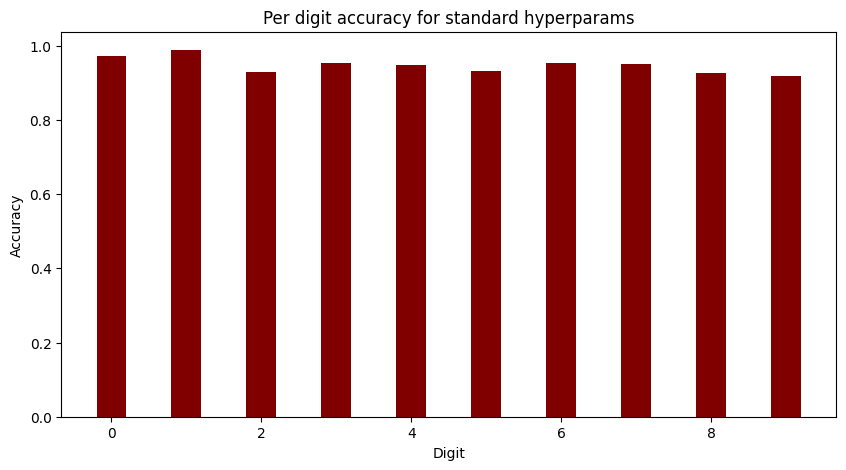

-------------------------------------------------- 
 Begin Learning-Rate Hyper-Parameter 1: 1.0
Epoch 0 : 9481 / 10000
Epoch 1 : 9483 / 10000
Epoch 2 : 9478 / 10000
Epoch 3 : 9480 / 10000
Epoch 4 : 9479 / 10000
Epoch 5 : 9484 / 10000
Epoch 6 : 9480 / 10000
Epoch 7 : 9479 / 10000
Epoch 8 : 9481 / 10000
Epoch 9 : 9479 / 10000
Epoch 10 : 9483 / 10000
Epoch 11 : 9486 / 10000
Epoch 12 : 9479 / 10000
Epoch 13 : 9479 / 10000
Epoch 14 : 9481 / 10000
Epoch 15 : 9482 / 10000
Epoch 16 : 9483 / 10000
Epoch 17 : 9482 / 10000
Epoch 18 : 9482 / 10000
Epoch 19 : 9479 / 10000
Epoch 20 : 9483 / 10000
Epoch 21 : 9481 / 10000
Epoch 22 : 9483 / 10000
Epoch 23 : 9482 / 10000
Epoch 24 : 9486 / 10000
Epoch 25 : 9485 / 10000
Epoch 26 : 9482 / 10000
Epoch 27 : 9486 / 10000
Epoch 28 : 9482 / 10000
Epoch 29 : 9481 / 10000
Approx. Accuracy per #: [0.98 0.99 0.93 0.95 0.95 0.93 0.95 0.95 0.92 0.92]


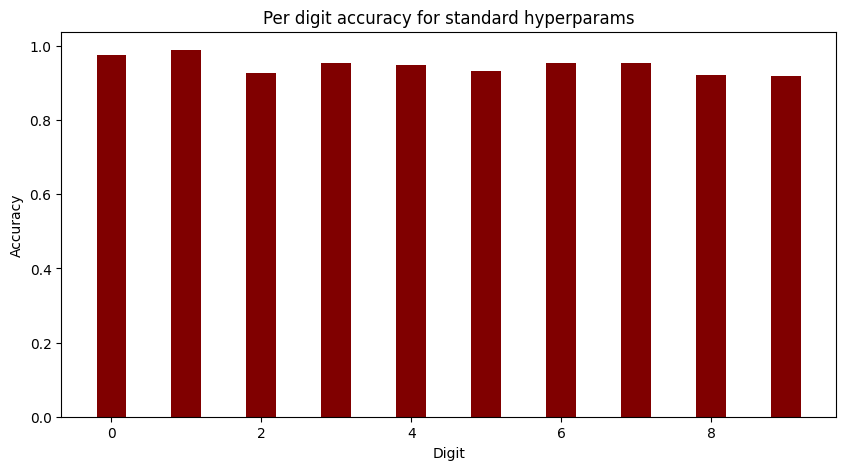

-------------------------------------------------- 
 Begin Learning-Rate Hyper-Parameter 2: 3.0
Epoch 0 : 9486 / 10000
Epoch 1 : 9478 / 10000
Epoch 2 : 9479 / 10000
Epoch 3 : 9481 / 10000
Epoch 4 : 9476 / 10000
Epoch 5 : 9484 / 10000
Epoch 6 : 9470 / 10000
Epoch 7 : 9481 / 10000
Epoch 8 : 9470 / 10000
Epoch 9 : 9452 / 10000
Epoch 10 : 9469 / 10000
Epoch 11 : 9470 / 10000
Epoch 12 : 9481 / 10000
Epoch 13 : 9466 / 10000
Epoch 14 : 9473 / 10000
Epoch 15 : 9480 / 10000
Epoch 16 : 9482 / 10000
Epoch 17 : 9479 / 10000
Epoch 18 : 9473 / 10000
Epoch 19 : 9487 / 10000
Epoch 20 : 9474 / 10000
Epoch 21 : 9471 / 10000
Epoch 22 : 9481 / 10000
Epoch 23 : 9479 / 10000
Epoch 24 : 9478 / 10000
Epoch 25 : 9483 / 10000
Epoch 26 : 9478 / 10000
Epoch 27 : 9477 / 10000
Epoch 28 : 9480 / 10000
Epoch 29 : 9480 / 10000
Approx. Accuracy per #: [0.98 0.99 0.93 0.95 0.95 0.93 0.95 0.96 0.92 0.92]


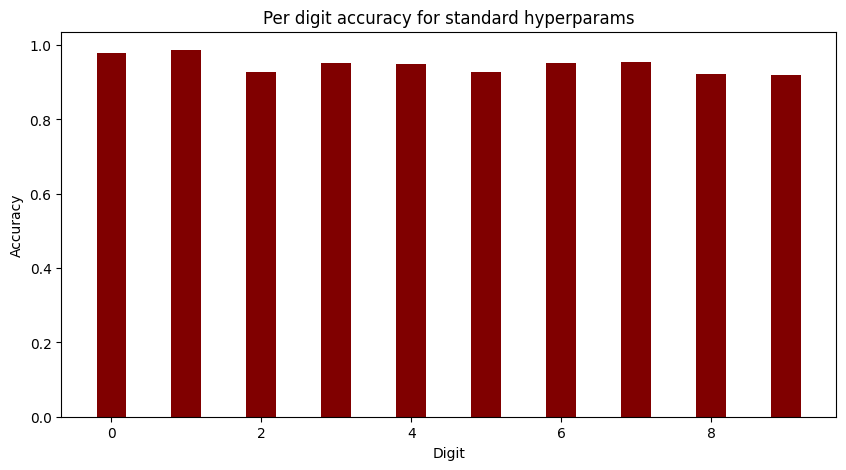

-------------------------------------------------- 
 Begin Learning-Rate Hyper-Parameter 3: 5.0
Epoch 0 : 9477 / 10000
Epoch 1 : 9440 / 10000
Epoch 2 : 9451 / 10000
Epoch 3 : 9467 / 10000
Epoch 4 : 9468 / 10000
Epoch 5 : 9465 / 10000
Epoch 6 : 9452 / 10000
Epoch 7 : 9471 / 10000
Epoch 8 : 9466 / 10000
Epoch 9 : 9475 / 10000
Epoch 10 : 9457 / 10000
Epoch 11 : 9491 / 10000
Epoch 12 : 9463 / 10000
Epoch 13 : 9468 / 10000
Epoch 14 : 9466 / 10000
Epoch 15 : 9473 / 10000
Epoch 16 : 9487 / 10000
Epoch 17 : 9450 / 10000
Epoch 18 : 9436 / 10000
Epoch 19 : 9464 / 10000
Epoch 20 : 9439 / 10000
Epoch 21 : 9465 / 10000
Epoch 22 : 9466 / 10000
Epoch 23 : 9450 / 10000
Epoch 24 : 9474 / 10000
Epoch 25 : 9485 / 10000
Epoch 26 : 9455 / 10000
Epoch 27 : 9459 / 10000
Epoch 28 : 9470 / 10000
Epoch 29 : 9466 / 10000
Approx. Accuracy per #: [0.97 0.99 0.93 0.95 0.96 0.92 0.96 0.96 0.91 0.91]


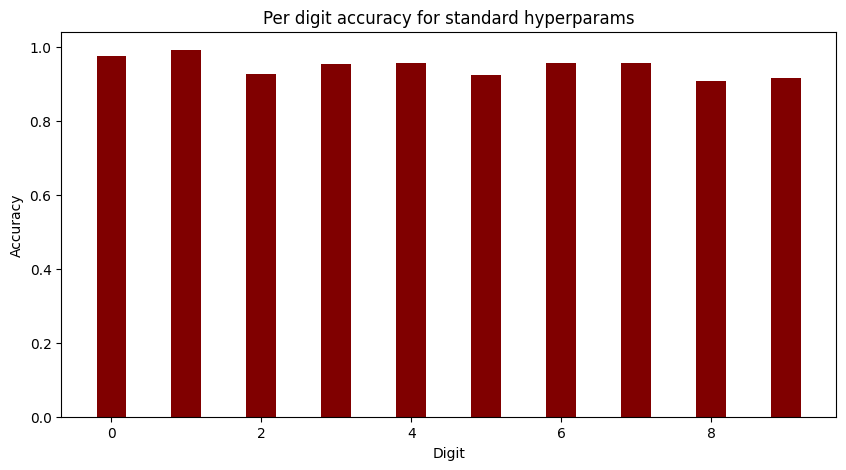

In [25]:
# part 3 - experiment with different hyper parameters
avg_acc = []

#  epochs - 5, 15, 30, 60 (batch size 10, learning 3.0)
epochs = [5, 15, 30, 60] # len = 4
for i in range(len(epochs)):
    print("-"*50, "\n", f"Begin Epoch Hyper-Parameter {i+1}:", epochs[i])
    net.SGD(training_data, epochs[i], 10, 3.0, test_data=test_data)
    acc = calc_accuracy(test_data)
    avg_acc.append(sum(acc)/10)
    print_accuracy(acc)

#  batch - 5, 10, 50, 100 (epochs 30, learning 3.0)
batches = [5, 10, 50, 100] # len = 4
for i in range(len(batches)):
    print("-"*50, "\n", f"Begin Batch Hyper-Parameter {i+1}:", batches[i])
    net.SGD(training_data, 30, batches[i], 3.0, test_data=test_data)
    acc = calc_accuracy(test_data)
    avg_acc.append(sum(acc)/10)
    print_accuracy(acc)

#  learning rate - 1.0, 3.0, 5.0 (epochs 30, batch size 10)
learn = [1.0, 3.0, 5.0] # len = 3
for i in range(len(learn)):
    print("-"*50, "\n", f"Begin Learning-Rate Hyper-Parameter {i+1}:", learn[i])
    net.SGD(training_data, 30, 10, learn[i], test_data=test_data)
    acc = calc_accuracy(test_data)
    avg_acc.append(sum(acc)/10)
    print_accuracy(acc)

In [43]:
idx_max = avg_acc.index(max(avg_acc))
print(avg_acc)

if idx_max < 4:
  print(f"Most accurate was Epoch {idx_max+1} with a value of {epochs[idx_max]}.")
elif idx_max < 8:
  print(f"Most accurate was Batch {idx_max-3} with a value of {batches[idx_max-4]}.")
else: print(f"Most accurate was Learning-Rate {idx_max-7} with a value of {learn[idx_max-8]}.")

[0.947190935452495, 0.9451828626008485, 0.9473660147164848, 0.946040791541181, 0.9455989865262595, 0.9479259070235001, 0.947420580185871, 0.9472792881232455, 0.9474458003945398, 0.9473308624892155, 0.9458072819258303]
Most accurate was Batch 2 with a value of 10.


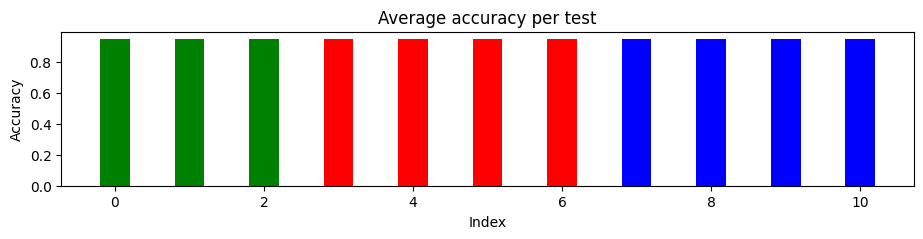

In [35]:
fig2 = plt.figure(figsize = (11, 2))
  # creating the bar plot
plt.bar(range(0,3), avg_acc[:3], color ='green',
        width = 0.4)
plt.bar(range(3,7), avg_acc[3:7], color ='red',
        width = 0.4)
plt.bar(range(7,11), avg_acc[7:], color ='blue',
        width = 0.4)
plt.xlabel("Index")
plt.ylabel("Accuracy")
plt.title("Average accuracy per test")
plt.show()

In [41]:
min_acc, max_acc = min(avg_acc), max(avg_acc)
print("Percent difference: ", (max_acc - min_acc)/min_acc*100)

Percent difference:  0.29021309327420575


## Findings

I ran this 3 times, and interestingly enough Batch 1 and 2 kept getting the slightest advantage in accuracy. I would love to test more, but it takes hours for a full run in Colab. My laptop is faster!

The differences are completely negligable and way beneath an acceptable margin for error (10%). I would have expected accuracy to change much more for all the different tests.